# Homework 3: k-means clustering

The goal of this homework is to implement the k-means algorithm, i.e. to find k clusters in a given dataset. The following code creates testdata which you can use to test your implementation. It uses the functon `make_blobs` of the sklearn package (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html for mor information on this function). 

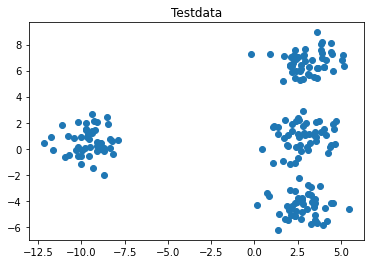

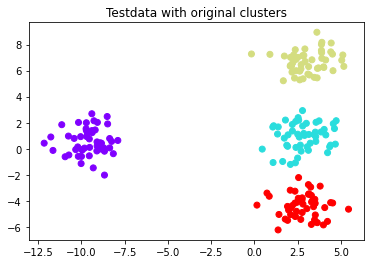

In [79]:
## Creating the testdata
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from sklearn.datasets import make_blobs # We use this to create sample data

d=2 # dimensions. In our example 2
number_of_clusters = 4

# The following code creates random datapoints with number_of_clusters clusters in d dimensions (cluster_std gives the standard deviation. bigger -> wider spread)
data = make_blobs(n_samples=200, n_features=d,centers=number_of_clusters, cluster_std=1)

# The datapoints
points = data[0]

# The cluster assignment used in the creation of the data. This is what we want to obtain by ourself by just considering the points
# contains numbers 0,...,number_of_clusters-1
original_clusters = data[1]

# plots the data points with the original cluster assignment
plt.title("Testdata")
plt.scatter(points[:,0],points[:,1])
plt.show()

plt.title("Testdata with original clusters")
plt.scatter(points[:,0],points[:,1],c=original_clusters,cmap='rainbow')
plt.show()

## Recall from the lecture
Given a $k\geq 1$ (number of clusters) a set of points $P \subset \mathbb{R}^d$ we want to find a function $c: P \rightarrow \{1,\dots,k\}$ which gives the best way of partitioning the set $P$ into $k$ clusters.

For $i=1,\dots,k$ the $i$-th **cluster** is given by 
\begin{align*}
C_i = \left\{ p \in P \mid c(p) = i \right\} \,.
\end{align*}

For a given $c$ the **within-cluster sum of squares (WCSS)** is defined by
\begin{align*}
	S_c = \sum_{i=1}^k \sum_{p \in C_i} ||p - \mu_i||^2 \,.
\end{align*}
Here $\mu_i \in \mathbb{R}^d$ denotes the **mean** of the cluster $C_i$ given by
\begin{align*}
	\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}
The goal is to find a $c$ such that $S_c$ is minimal.


---


## k-means algorithm

1) Initialize the  means $\mu_1, \dots, \mu_k \in \mathbb{R}^d$ with some starting value.
 - **Forgy method:** Choose randomly $k$ different numbers $\{s_1,\dots,s_k\} \subset \{1,\dots,n\}$ and set $$\mu_i= p_{s_i}$$ for $i=1,\dots,k$
 -**Random partition:** Choose $c: P \rightarrow \{1, \dots, k\}$ randomly and set  for $i=1,\dots,k$
\begin{align*}
						\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}

2) Define the clusters $C_i$ for $i=1,\dots,k$ by 
\begin{align*}
	C_i = \big\{ p \in P \mid || p - \mu_i || \leq  || p - \mu_j ||  \text{ for } j = 1,\dots,k \big\}\,.
\end{align*}

3) Recalculate the means $\mu_i$ for $i=1,\dots,k$ by 
\begin{align*}
	\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}

4) Repeat with step 2.



# **Exercise 1**

Implement the k-means algorithm. You can either implement it in your complete own (and maybe much better) way or you can follow the code below. In the code below we represent the function $c: P \rightarrow \{1,\dots,k\}$ as an array of size $n = |P|$ with entries given in $\{0,\dots,k-1\}$.
*italicized text*

In [80]:
# k-means algorithm

k = 4 # number of clusters

means = np.zeros((k,d)) # the k-means (points in R^d)

n = len(points) # number of points  (make sure to execute the code on top of the homework)

clusters = [0 for i in range(n)] # the current function c 
import random

# Initialize the k-means by using the Forgy method 
def init_forgy():
  for i in range(k):
    h = random.randint(0, n - 1)
    means[i] = points[h]
  return means #position of cluster

# Initilize the k-means with Random partition
def init_random():
  for i in range(n):
    clusters[i] = random.randint(0, k - 1)
  return clusters    


# Updates the means depending on the current clusters
# This is step 3 in the algorithm 
def update_means():
  for i in range(k):
    number = 0
    point = np.zeros((d))
    for j in range(n):
      if clusters[j] == i:
        number += 1
        for m in range(d):
          point[m] += points[i][m]
    for m in range(d):
      means[i][m] = point[m] / number


# Chooses the cluster according to the current means
# This is step 2
def choose_clusters():
  for i in range(n):
    d = np.linalg.norm(points[i]-means[clusters[i]])
    for j in range(k):
      if np.linalg.norm(points[i]-means[j]) < d:
        d = np.linalg.norm(points[i]-means[j])
        clusters[i] = j  


# within-cluster sum of squares (WCSS)
def within_cluster_sos():
  sum=0
  for i in range(k):
    for j in range(n): 
      if clusters[j]==i:
        sum+=np.linalg.norm(points[j]-means[i])**2
  return sum

# The k-means algorithm with random partition
def kmeans_random(number_of_steps=10):
  init_random() # Step 1

  print("After init with Random Partition: WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

  for s in range(number_of_steps):
    choose_clusters() # Step 2
    update_means() # Step 3

  print("Did ", number_of_steps ," steps. WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

# The k-means algorithm with the Forgy method
def kmeans_forgy(number_of_steps=10):
  init_forgy() # Step 1
  choose_clusters()

  print("After init with Forgy: WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

  for s in range(number_of_steps):
    choose_clusters() # Step 2
    update_means() # Step 3

  print("Did ", number_of_steps ," steps. WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

Test your implementation with the following code (You can also implement your own tests).


After init with Random Partition: WCSS =  9490.63103877978


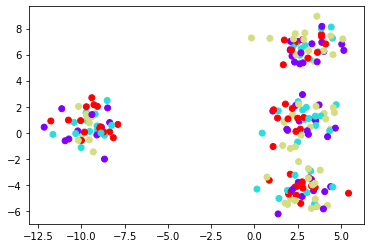

Did  200  steps. WCSS =  6496.028862367446


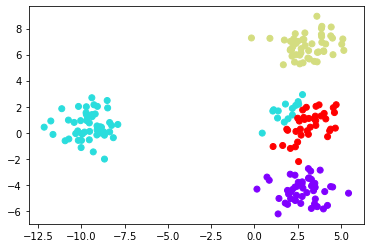

After init with Forgy: WCSS =  5561.447262857931


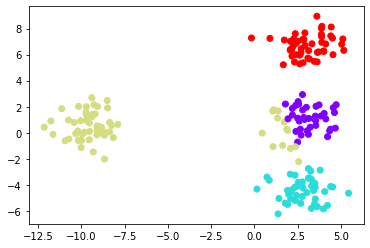

Did  200  steps. WCSS =  6496.028862367446


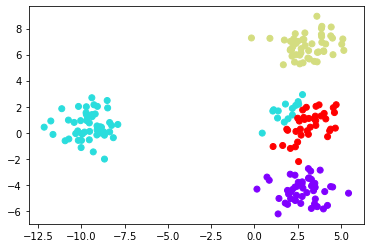

In [81]:
kmeans_random(200)
kmeans_forgy(200)

# **Exercise 2** (Bonus)

For a given dataset consider different $k$. Plot the WCSS for different $k$ after using the $k$-means algorithm. How can you decide with this graph which $k$ might be the best?